# Exploratory data analysis

### Róbert Móro, Jakub Ševcech

IAU, 10.10.2018

## Please, give us your feedback here: https://tinyurl.com/iau2019-w03

## You can ask us directly or at http://slido.com#iau2019-w03

# Feedback from the previous lectures

What is Docker? https://www.docker.com/resources/what-container

Online courses on statistics

- https://www.coursera.org/learn/statistical-inference
- https://www.coursera.org/specializations/statistics-with-python
- https://www.coursera.org/specializations/statistics
- stay tuned on 5. lecture

In what real-world applications can we find what we learn at this course?

## Today, we will talk about, how to...

- load data

- analyze individual attributes

- analyze relations between attributes

- visualize data (*suitable visualization types, attributes of good visualizations, how not to lie with a visualizationv*)

**...how to get to know your data**

## Before we start analyzing data, we should make clear...

What questions we want to answer with the analysis

What task we are about to solve

### At this course, we will only deal with two tasks

Classification

Regression

### In both cases, we aim to find a function $f$ of attributes $X$ that predicts a dependent variable $Y$

In case of regression $Y \in R$

In case of classification $Y \in \{C_1, C_2,\dots, C_N\}$

Both tasks are examples of **supervised learning**

### Let us assume, we know the task we want to solve

### And we are clear about the initial questions we aim to answer

<img src="img/I-got-all-the-data-I-have-the-best-data.jpg" alt="I got all the data, I have the best data!" style="width: 1000px; margin-left: auto; margin-right: auto;"/>

Let's load them...

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

,1990-01-01 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


We can see that there were multiple problems with loading the data - everything ended up in one column and the first row was interpreted as a header.

## It is better to load the data in a text editor (or a terminal) before we load them into a Panda's data frame

In [3]:
%%bash
head data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0
1990-01-02	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	48.000	1	-999.000	0	-999.000	0	48.000	1	50.000	1	55.000	1	59.000	1	58.000	1	59.000	1	58.000	1	57.000	1	58.000	1	54.000	1	49.000	1	48.000	1
1990-01-03	51.000	1	50.000	1	47.000	1	48.000	1	51.000	1	52.000	1	58.000	1	57.000	1	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	69.000	1	74.000	1	-999.000	0	-999.000	0	103.000	1	84.000	1	75.000	1	-999.000	0	-999.000	0	-999.000	0
1990-01-04	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	67.000	1	57.000	1	57.000	1	-999.000	0	71.000	1	74.000	1	70.000	1	70.000	1	69.000	1	65.000	1	64

## Now, we can tune the `read_csv` command to load the data properly

In [4]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


## Lessons learned

Before we load the data, we should be able to answer these questions:

* What is the source of the data? How (by whom) were they created?
* In what format are they represented?
* How much data do we have (how many observations, data points)?
* Is there any interpretations of the columns (attributes)?

## Now we can finally start exploratory analysis! We want to...

Describe the data and their characteristics = **Descriptive statistics**

Formulate and test hypotheses on the data = **Data visualization** + inference statistics

Identify relations between attributes = **Relations, dependencies** (e.g. correlation)

Identify problems in data = What we need to deal with in data preprocessing

### Possible problems in data

* unsuitable data structure (e.g., data are not in a tabular form or one entity is described by multiple table rows)
* duplicated records or ambiguous mapping between records
* various data format
* missing values
* outliers
* and others...

## Iris dataset

Three species: setosa, virginica, versicolor

<img src="img/iris_setosa.jpg" alt="Iris setosa" style="width: 200px; float: left; margin-right: 20px;"/>
<img src="img/iris_virginica.jpg" alt="Iris virginica" style="width: 200px; float: left; margin-right: 20px;"/>
<img src="img/iris_versicolor.jpg" alt="Iris versicolor" style="width: 200px; float: left; margin-right: 20px;"/>

In [5]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.shape[0] - iris.dropna().shape[0]

0

In [7]:
iris[iris.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [8]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Attribute types

* Continuous (numerical)
* Discrete (categorical) - nominal vs. ordinal

**Beware of the categorical attributes which are represented as numbers; these only code a category**

### Univariate analysis

* **continuous** - deskriptive statistics (mean, median, ...), distributions
* **categorical** - number of unique values, frequency of the values

### Bivariate analysis

* **continuous-continuous** - relationship, correlation
* **continuous-categorical** - differences in the values of a continuous attribte based on a categorical one
* **categorical-categorical** - table, ratio of value occurrences

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.describe(exclude=np.number)

,species
count,150
unique,3
top,virginica
freq,50


## Univariate analysis: Continuous attributes

We want to see the data distribution - what their **center** is and how they are **dispersed**.

### Measures of centrality

* **mean**
* **median**: 50% of data has lower or equal value and 50% higher
* **mode**: the most frequent (probable) value

In [11]:
x = np.array([1000, 1000, 1200, 1100, 10000])
x.mean()

2860.0

In [12]:
np.median(x)

1100.0

In [13]:
stats.mode(x)

ModeResult(mode=array([1000]), count=array([2]))

### Measures of dispersion (1/2)

* **variance**: mean quadratic devation from the mean
$$ E[(X-E[X])^2] $$

* **standard deviation**: square root of variance, measured in the units of the measured variable
$$ s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N{(x_i-\overline{x})^2}} $$ 

### Measures of dispersion (2/2)

* **range**: max - min
* **first/third quartile**: 25% of data has a lower value than the first quartile (Q1); 75% has a lower value than the third quartile (Q3)
* **percentile**: XX% of the values are lower
* **inter quartile range**: difference bewteen Q1 and Q3, more robust to outliers than range

### We can use two basice visualization types to visualize continuous variables

* Boxplot
* Histogram (density plot)

## Boxplot

<img src="img/outlier_box_plot.gif" alt="Boxplot explained" style="width: 500px; margin-right: auto; margin-left: auto;"/>
   
(source: https://taps-graph-review.wikispaces.com/Box+and+Whisker+Plots)  

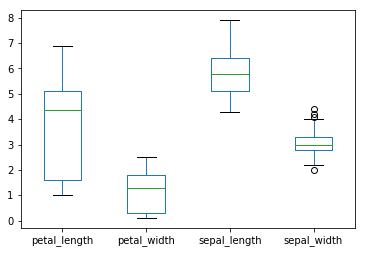

In [14]:
iris[iris.columns.difference(['species'])].plot.box()

## Histogram

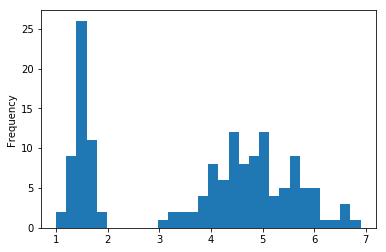

In [15]:
iris.petal_length.plot.hist(bins=30)

## Density plot

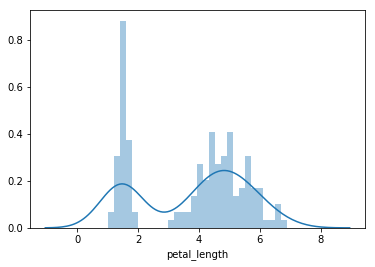

In [16]:
sns.distplot(iris.petal_length, bins=30)

## Skewness and kurtosis

### Skewness

Skewness says, how much the distribution is skewed from the center. A symetric distribution has a value of skewness 0. It compares the relative size of the distribution tails.

A distribution skewed to left has a value od skewness higher than 0; skewed to right has a value lower than 0.

<img src="img/skewness_en.png" alt="Skewness explained" style="width: 1000px;"/>

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normal distribution: Skewness 0.04837')

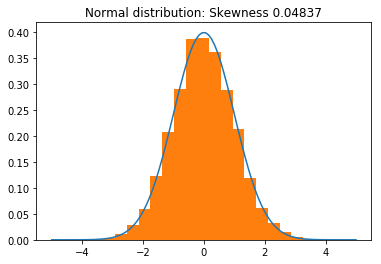

In [17]:
sample_size = 10000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normal distribution: ""Skewness %.5f" % (stats.skew(sample), ))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Chi-squared(5): Skewness 1.39053')

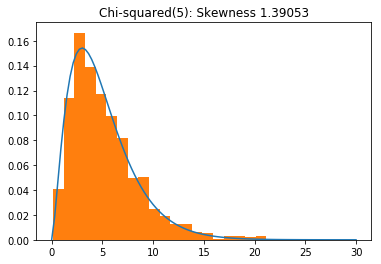

In [18]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Chi-squared(5): ""Skewness %.5f" % (stats.skew(sample)))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'30 - Chi-squared(5): Skewness -1.25084')

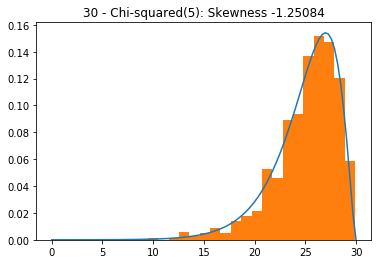

In [19]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = 30 - chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(30 - x))
plt.hist(sample, normed=True, bins=20)
plt.title("30 - Chi-squared(5): ""Skewness %.5f" % (stats.skew(sample), ))

### Kurtosis

Kurtosis measures the amount of data in the distribution tails. It represents the propensity of the distribution to generate outliers.

The normal distribution has a value of 3.
If a distribution has a value higher than 3, more data is in the tails. If it is lower than 3, less data in in the tails.

There is also *excess kurtosis*, which is a difference from a normal distribution, i.e., kurtosis - 3.

### Kurtosis

![kurtosis](img/kurtosis_en.png)

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normal distribution: Kurtosis -0.01846')

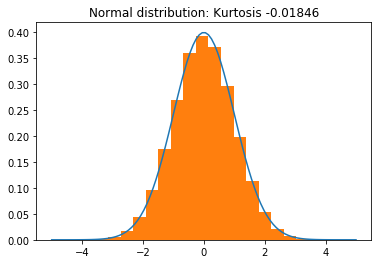

In [20]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normal distribution: ""Kurtosis %.5f" % (stats.kurtosis(sample), ))

Default setting returns excess kurtosis.

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normal distribution: Kurtosis 2.97805')

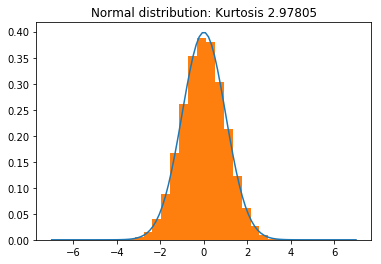

In [21]:
sample_size = 100000

norm = stats.norm(0,1)
x = np.linspace(-7, 7, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normal distribution: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Logistic distribution: Kurtosis 3.93985')

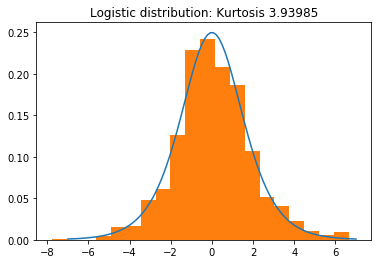

In [22]:
sample_size = 1000

logistic = stats.logistic()
x = np.linspace(-7, 7, 100)
sample = logistic.rvs(sample_size)

plt.plot(x, logistic.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("Logistic distribution: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False)))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Uniform distribution: Kurtosis 1.72627')

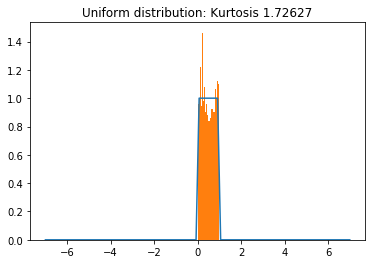

In [23]:
sample_size = 1000

uniform = stats.uniform()
x = np.linspace(-7, 7, 100)
sample = uniform.rvs(sample_size)

plt.plot(x, uniform.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("Uniform distribution: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False)))

## Univariate analysis: Categorical attributes

The most common way of displaying categorical data is by the means of a frequency table (showing either absolute numbers of categorical values or their ratios). 

For visual display, **bar plot** can be used.

In [24]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

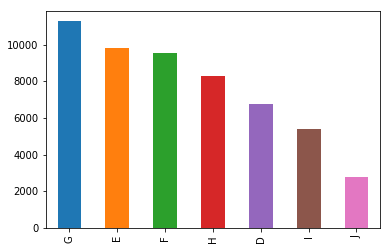

In [26]:
diamonds.color.value_counts().plot(kind='bar')

### When is it suitable to use bar chart and when pie chart? What are they (dis)advantages?

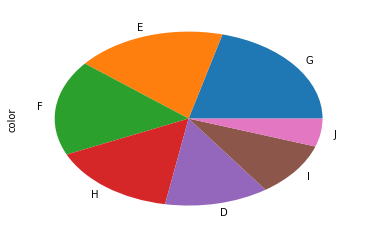

In [27]:
diamonds.color.value_counts().plot(kind='pie')

If there are more than 3-4 categorical values, it is preferable to use a bar chart.

## Bivariate analysis

### Continuous - continuous: Scatter plot

It is the most common visualization of the two attributes' relationship.

It shows how the values are distributed and allows us to find out whether there are any natural clusters.

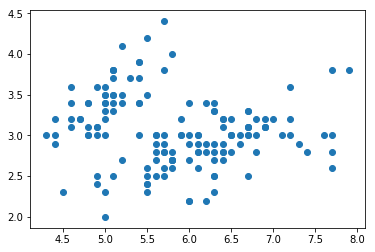

In [28]:
plt.scatter(iris.sepal_length, iris.sepal_width)

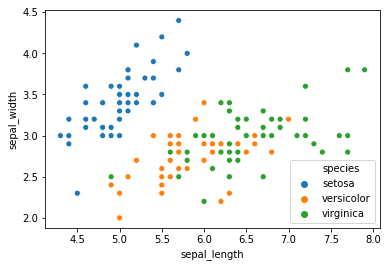

In [29]:
sns.scatterplot(iris.sepal_length, iris.sepal_width, hue=iris.species)

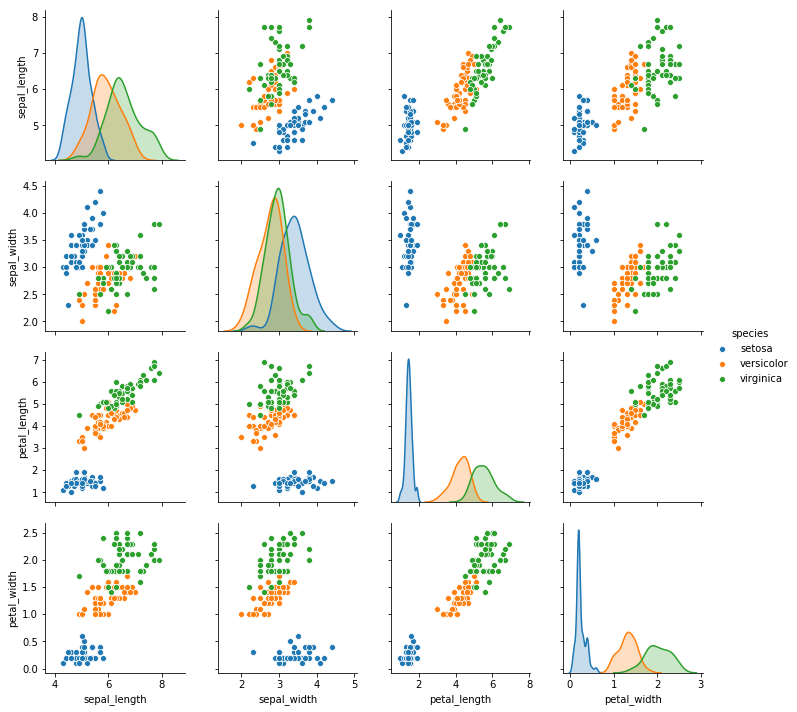

In [30]:
sns.pairplot(iris, hue="species")

## Correlation

It is a value from [-1, 1] range, which indicates the strength of the linear relationship between the two attributes.

* -1 prefect negative correlation
* 0 no correlation
* 1 perfect positive correlation

Pearson's correlation coefficient:
$$ corr(X, Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y} = \frac{E[(X-E[X])(Y-E[Y])]}{\sigma_X\sigma_Y}$$

$$ r_{xy} = \frac{\sum_{i=1}^{n}{(x_i-\overline{x})(y_i-\overline{y})}}{(n-1)s_xs_y} $$

![scatter plot correlation](img/scatter-continuous-continuous.png)

Source: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

Pearson's correlation coefficient measures a **linear relationship** between two attributes.

However, there can also be a nonlinear relationship between the two attributes.

Alternatives to the Pearson's correlation coefficient, which do not require linearity, only monotony, are:
* Spearman's coefficient
* Kendal's $\tau$

Pearson correlation: 0.963


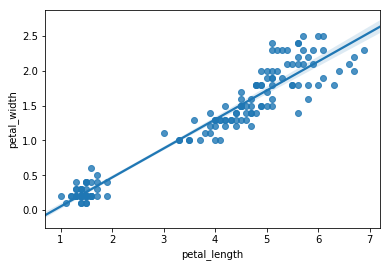

In [31]:
sns.regplot(x="petal_length", y="petal_width", data=iris)
print("Pearson correlation: %.3f" % iris.petal_length.corr(iris.petal_width))

In [32]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


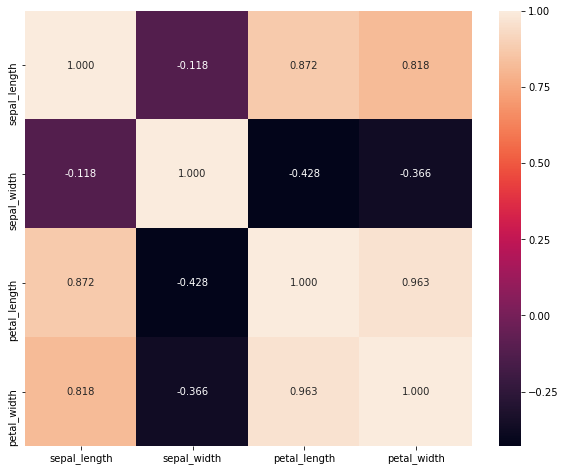

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(iris.corr(), ax=ax, annot=True, fmt=".3f")

## Correlation $\neq$ causality

The correlation of two event can be due chance. (*Examples of funny correlations can be found here:* http://tylervigen.com/spurious-correlations)

Or there can be a third event that is the true cause of both correlated events. (*For example, students' attendance on lectures can correlate with their final score for the course, but it can be caused by the fact that more motivated students attend the lectures so they would perform better even without attending the lectures.*)

Proving causality is nontrivial - a controlled (randomized) experiment is needed

<img src="img/xkcd_correlation.png" alt="Correlation is not causation" style="width: 800px; margin-right: auto; margin-left: auto;"/>

(Source: https://xkcd.com/552/)

## Always use scatterplot to check the correlation

In [34]:
df = sns.load_dataset("anscombe")

In [35]:
df.groupby('dataset').agg(['mean'])

,x,y
,mean,mean
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [36]:
df.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

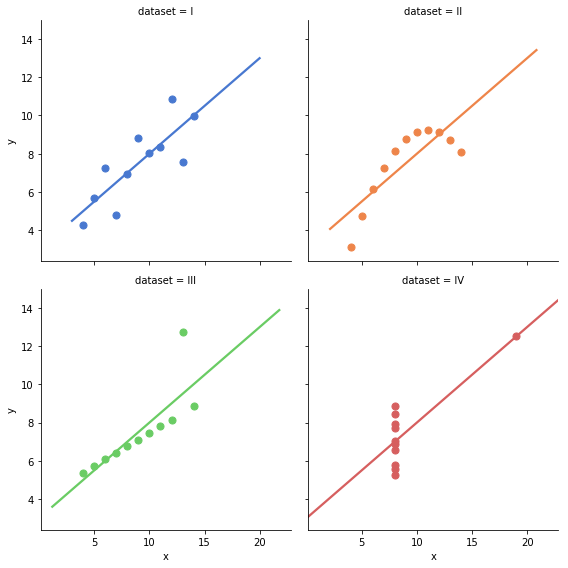

In [37]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### Impact of just one outlier

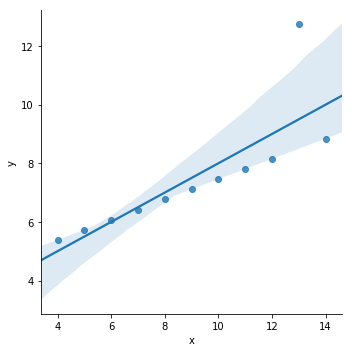

In [38]:
d3 = df.loc[df.dataset == 'III', ['x', 'y']]
sns.lmplot(x='x', y='y', data=d3)

### Impact of just one outlier

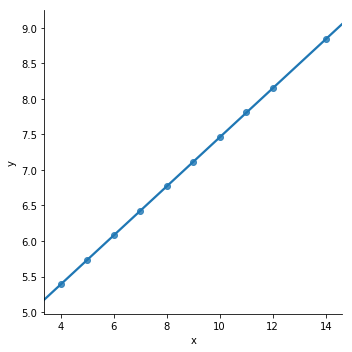

In [39]:
d3_no = d3.drop(24)
sns.lmplot(x='x', y='y', data=d3_no)

## Bivariate analysis: Continuous - categorical

The most common way is to group the numerical values based on their category and display distribution of these subsets using a histogram or a boxplot.

In other words, we use the same techniques as for the continuous attributes, but applied for each group (categorical value) separately.

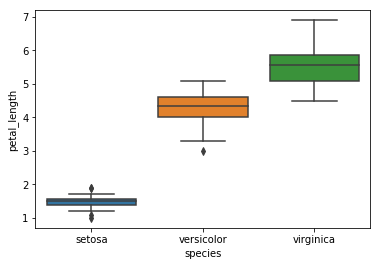

In [40]:
sns.boxplot('species', 'petal_length', data=iris)

## Bivariate analysis: Categorical - categorical

* Contingency table
* Heatmap
* Stacked bar chart
* Chi-squared tests

In [41]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Frequency table
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
survived_class = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"])
survived_class.index= ["died","survived"]
survived_class

Pclass,1,2,3
died,80,97,372
survived,136,87,119


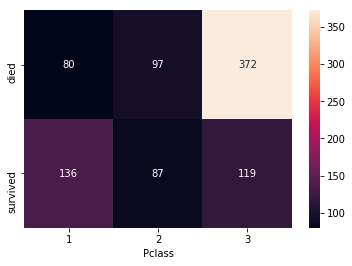

In [44]:
sns.heatmap(survived_class, annot=True, fmt="d")

Pclass,1,2,3
died,0.37037,0.527174,0.757637
survived,0.62963,0.472826,0.242363


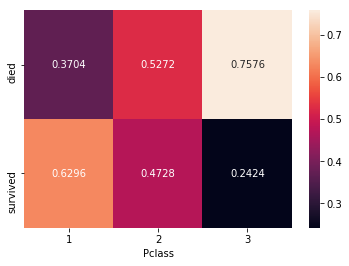

In [45]:
survived_class_perc = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"],
                            normalize='columns') #'index', 'all'
survived_class_perc.index= ["died","survived"]

sns.heatmap(survived_class_perc, annot=True, fmt=".4f")
survived_class_perc

In [46]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"]],
            margins=True)

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

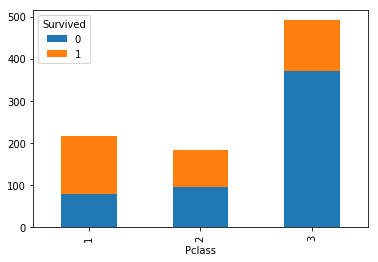

In [47]:
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).plot.bar(stacked=True)

## Visualizations helps us understand the data

If done properly...

## Principles of good information visualizations according to E. Tufte (based on Skiena, chapter 6)

Maximize data-ink ratio

Minimize the lie factor

Minimize chartjunk

Use proper scales and clear labeling

## Principles of good information visualizations according to E. Tufte (based on Skiena, chapter 6)

Make effective use of color

Exploit the power of repetition

## Examples of common visualization lies (Skiena, chapter 6.2.2)

Presenting means without variance

Presenting interpolations without the actual data

Distortions of scale

## Examples of common visualization lies (Skiena, chapter 6.2.2)

Eliminating tick labels from numerical axes

Hide the origin point from the plot

<img src="img/axis_manipulation.png" alt="Problems with y axis" style="width: 600px; margin-right: auto; margin-left: auto;"/>

(Source: https://cs.wikipedia.org/wiki/Sloupcov%C3%BD_graf)

<img src="img/obamacareenrollment-fncchart.jpg" alt="Obamacare on FOX News" style="width: 1000px; margin-right: auto; margin-left: auto;"/>

(Source: https://www.mediamatters.org/msnbc/msnbc-criticizes-fox-news-airing-dishonest-obamacare-enrollment-chart)

<img src="img/kazimir_graf.jpg" alt="How the natural gas prices did (not) go down" style="width: 1000px; margin-right: auto; margin-left: auto;"/>

You can find other examples of manipulations of charts and statistics in the book "*A Field Guide to Lies and Statistics*" by D. Levitina.

Examples of practical pitfalls of plotting in Python can be found here: https://anaconda.org/jbednar/plotting_pitfalls/notebook

## Other useful source

Steven S. Skiena: The Data Science Design Manual. Springer International Publishing, chapter 6.

Allen B. Downey: Think Stats: Exploratory Data Analysis in Python (2nd ed.). O'Reilly Media, 2014, chapters 1, 2, 7.

Jake VanderPlas: Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media, 2016, chapter 4.

Edward R. Tufte: The Visual Display of Quantitative Information. Graphics Press, Cheshire, CT, 1983.

# The main takeaways of the today's lecture

**Get to know your data!** A good data scientist must be curious (and have a healthy scepticism).

*Using machine learning without knowing your data is the same as running blind.*

Visualizations are useful when doing exploratory analysis

But we have to know how to use them properly

# Now to the project assignment...

## Please, give us your feedback here: https://tinyurl.com/iau2019-w03